In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


## pd.to_datetime

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

## .dt

In [4]:
df['date'].dt.day

0       1
1       2
2       3
3       4
4       7
       ..
256    25
257    26
258    27
259    30
260    31
Name: date, Length: 261, dtype: int64

In [5]:
df['date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
256    12
257    12
258    12
259    12
260    12
Name: date, Length: 261, dtype: int64

In [6]:
df['date'].dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4         Monday
         ...    
256    Wednesday
257     Thursday
258       Friday
259       Monday
260      Tuesday
Name: date, Length: 261, dtype: object

In [7]:
df['day_of_week'] = df['date'].dt.day_name()
df.head()

,date,coffee_consumption,day_of_week
0,2019-01-01,14.301915,Tuesday
1,2019-01-02,12.905900,Wednesday
2,2019-01-03,10.046015,Thursday
3,2019-01-04,6.354805,Friday
4,2019-01-07,8.545563,Monday


In [8]:
df.set_index('date', inplace = True)

## asfreq, resample

In [9]:
fill_df = df.asfreq('D')
fill_df

,coffee_consumption,day_of_week
date,,
2019-01-01,14.301915,Tuesday
2019-01-02,12.905900,Wednesday
2019-01-03,10.046015,Thursday
2019-01-04,6.354805,Friday
2019-01-05,NaN,NaN
...,...,...
2019-12-27,9.464345,Friday
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN


In [10]:
df.resample('W').mean()

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-13,9.277212
2019-01-20,10.265097
2019-01-27,9.690260
2019-02-03,10.639508
2019-02-10,11.195485
2019-02-17,10.730911
2019-02-24,9.808429
2019-03-03,9.486304


In [11]:
df.resample('5D').mean()

,coffee_consumption
date,
2019-01-01,10.902159
2019-01-06,8.628348
2019-01-11,10.941607
2019-01-16,10.124445
2019-01-21,9.690260
...,...
2019-12-07,10.418495
2019-12-12,11.798295
2019-12-17,9.251785


## Forward and Back Fill

In [12]:
fill_df['forward'] = fill_df['coffee_consumption'].ffill()

In [13]:
fill_df['backwards'] = fill_df['coffee_consumption'].bfill()

In [14]:
fill_df

,coffee_consumption,day_of_week,forward,backwards
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,NaN,NaN,6.354805,8.545563
...,...,...,...,...
2019-12-27,9.464345,Friday,9.464345,9.464345
2019-12-28,NaN,NaN,9.464345,14.623106
2019-12-29,NaN,NaN,9.464345,14.623106


In [15]:
fill_df['day_of_week'] = fill_df.index.day_name()
fill_df.head(10)

,coffee_consumption,day_of_week,forward,backwards
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,NaN,Saturday,6.354805,8.545563
2019-01-06,NaN,Sunday,6.354805,8.545563
2019-01-07,8.545563,Monday,8.545563,8.545563
2019-01-08,9.410101,Tuesday,9.410101,9.410101
2019-01-09,7.219271,Wednesday,7.219271,7.219271


In [16]:
fill_df['coffee_consumption'] = fill_df['coffee_consumption'].fillna(0)

fill_df

,coffee_consumption,day_of_week,forward,backwards
date,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915
2019-01-02,12.905900,Wednesday,12.905900,12.905900
2019-01-03,10.046015,Thursday,10.046015,10.046015
2019-01-04,6.354805,Friday,6.354805,6.354805
2019-01-05,0.000000,Saturday,6.354805,8.545563
...,...,...,...,...
2019-12-27,9.464345,Friday,9.464345,9.464345
2019-12-28,0.000000,Saturday,9.464345,14.623106
2019-12-29,0.000000,Sunday,9.464345,14.623106


## Plotting

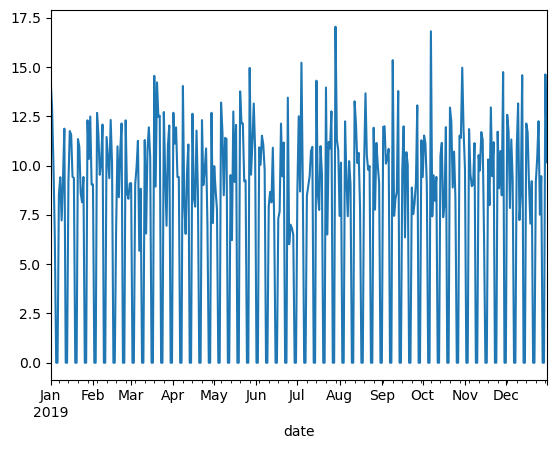

In [17]:
fill_df['coffee_consumption'].plot()
plt.show()

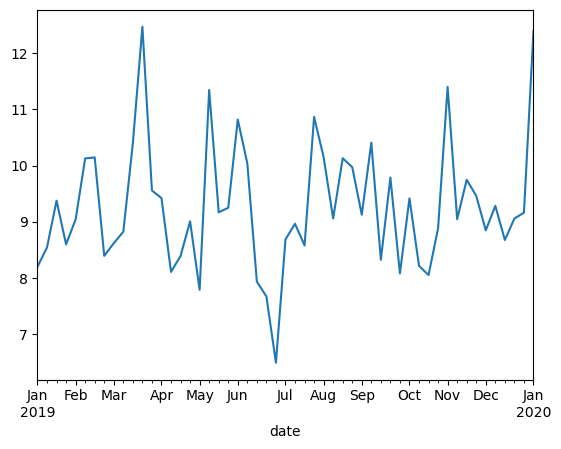

In [18]:
fill_df.resample('w').median()['coffee_consumption'].plot()
plt.show()

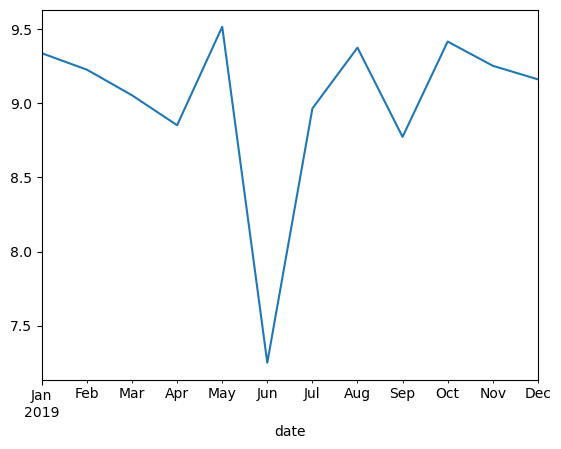

In [19]:
fill_df.resample('M').median()['coffee_consumption'].plot()
plt.show()

## Rolling

In [20]:
fill_df['coffee_consumption'].rolling(7).mean()

date
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-05         NaN
                ...   
2019-12-27    6.966184
2019-12-28    6.966184
2019-12-29    6.966184
2019-12-30    7.746276
2019-12-31    7.717121
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

In [21]:
fill_df['rolling_week_avg'] = fill_df['coffee_consumption'].rolling(7).mean()
fill_df.head(10)

,coffee_consumption,day_of_week,forward,backwards,rolling_week_avg
date,,,,,
2019-01-01,14.301915,Tuesday,14.301915,14.301915,NaN
2019-01-02,12.905900,Wednesday,12.905900,12.905900,NaN
2019-01-03,10.046015,Thursday,10.046015,10.046015,NaN
2019-01-04,6.354805,Friday,6.354805,6.354805,NaN
2019-01-05,0.000000,Saturday,6.354805,8.545563,NaN
2019-01-06,0.000000,Sunday,6.354805,8.545563,NaN
2019-01-07,8.545563,Monday,8.545563,8.545563,7.450600
2019-01-08,9.410101,Tuesday,9.410101,9.410101,6.751769
2019-01-09,7.219271,Wednesday,7.219271,7.219271,5.939394


In [22]:
fill_df['coffee_consumption'].rolling(3).sum()

date
2019-01-01          NaN
2019-01-02          NaN
2019-01-03    37.253830
2019-01-04    29.306721
2019-01-05    16.400821
                ...    
2019-12-27    29.228426
2019-12-28    16.977551
2019-12-29     9.464345
2019-12-30    14.623106
2019-12-31    24.791422
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

## strftime

In [23]:
fill_df.index.strftime('%A %B %Y')

Index(['Tuesday January 2019', 'Wednesday January 2019',
       'Thursday January 2019', 'Friday January 2019', 'Saturday January 2019',
       'Sunday January 2019', 'Monday January 2019', 'Tuesday January 2019',
       'Wednesday January 2019', 'Thursday January 2019',
       ...
       'Sunday December 2019', 'Monday December 2019', 'Tuesday December 2019',
       'Wednesday December 2019', 'Thursday December 2019',
       'Friday December 2019', 'Saturday December 2019',
       'Sunday December 2019', 'Monday December 2019',
       'Tuesday December 2019'],
      dtype='object', name='date', length=365)

## timedeltas

In [31]:
fill_df.index.min(), fill_df.index.max()

(Timestamp('2019-01-01 00:00:00', freq='D'),
 Timestamp('2019-12-31 00:00:00', freq='D'))

In [25]:
fill_df.index.max() - fill_df.index.min()

Timedelta('364 days 00:00:00')

## idxmax and idxmin

In [26]:
fill_df['coffee_consumption'].idxmax()

Timestamp('2019-07-29 00:00:00', freq='D')

In [30]:
fill_df['coffee_consumption'].max()

17.0434447448351

In [32]:
fill_df['coffee_consumption'].idxmin()

Timestamp('2019-01-05 00:00:00', freq='D')